In [116]:
import os
import re
import csv
import numpy as np


In [117]:
cwd = os.getcwd()

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


# preapre CSV

In [119]:
# benchmark_path = "/Users/u7826985/Projects/Nvidia/results/composite_hadamard_optimization"
AA_folder ="100taxa_diff_trees_1M_sites_AA"
DNA_folder ="100taxa_diff_trees_1M_sites"

In [120]:
# last_results_path = "/Users/u7826985/Projects/Nvidia/results/2025_10_20_a100_vs_c100"
results_path = "/Users/u7826985/Projects/Nvidia/results/2026_02_17_openACC_vs_cublas/"
output_csv = f"{results_path}/results.csv"
output_csv_aa = f"{results_path}/results_aa.csv"

In [121]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [133]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        op_type=""
        for file in files:
            if file.startswith("output_v100_cudaCublas_run"):
                op_type="CUDA"
            elif (file.startswith("output_v100_openACC_run") or file.startswith("output_v100_OpenACC_run")):
                op_type="OpenACC"
            else:
                continue
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[4] + "_" + file.split("_")[5]
                    # detect file name contains "a100"
                    run_number = file.split("_")[3]
                    print(tree_file_name)
                    
                    
                    
                    h200 = False
                    a100 = False
                    transposed = False
                    if "h200" in file.split("_")[-1]:
                        h200 = True
                    
                    elif "a100" in file.split("_")[-1]:
                        a100 = True
                        continue
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            print("found a match")
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            backend = op_type
                            print(backend)
                            if h200:
                                backend += "_H200"
                            elif a100:
                                backend += "_A100"
                            else:
                                backend += "_V100"
                           
                                
                            # if taxa != "100":
                            #     continue
                            # backend = op_type
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number])
                            
                            print(backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number)
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [123]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [124]:
# Write to CSV

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile", "run_number"])
        writer.writerows(data)
        
        


In [125]:
def plot_average_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()


def plot_boxplot_time_per_backend(df, logy=False, path=""):
    plt.figure(figsize=(10, 5))
    df.boxplot(column='time', by='backend')
    if logy:
        plt.yscale('log')
    plt.xlabel('Backend')
    plt.ylabel('Time (s)')
    plt.title('Time Distribution per Backend')
    plt.suptitle('')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()
    
def boxplot_per_tree_group_backend(df):
    # plot per tree file boxplot grouped by backend
    tree_files = df['treefile'].unique()
    for tree_file in tree_files:
        plt.figure(figsize=(10, 5))
        df_tree = df[df['treefile'] == tree_file]
        df_tree.boxplot(column='time', by='backend')
        plt.xlabel('Backend')
        plt.ylabel('Time (s)')
        plt.title(f'Time Distribution per Backend for {tree_file}')
        plt.suptitle('')
        plt.tight_layout()
        plt.show()

In [126]:
def plot_average_time_per_backend_v100(df, logy=False, path=""):
    # get only v100 backends
    df = df[df['backend'].str.contains('V100')]
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()



# Analysis of Results

In [127]:
data = []

In [106]:
# read_files_in_directory(f"{benchmark_path}/{AA_folder}", unique_name="_BENCHMARK")
read_files_in_directory(f"{results_path}/{AA_folder}", unique_name="_GPU")
# read_files_in_directory(f"{last_results_path}/{AA_folder}", unique_name="_OLDGPU")

write_to_csv(data, output_csv)

Reading file: output_v100_cudaCublas_run8_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517350554466 1.847017060000000 tree_1 run8
Reading file: output_v100_cudaCublas_run5_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517350554466 1.731227630000000 tree_1 run5
Reading file: output_v100_openACC_run9_tree_1_1000000_aa_openacc_v100.txt
tree_1
found a match
OpenACC
OpenACC_V100 100 1000000 1000000 -110413195.778517276048660 1.313442547000000 tree_1 run9
Reading file: output_v100_openACC_run2_tree_1_1000000_aa_openacc_v100.txt
tree_1
found a match
OpenACC
OpenACC_V100 100 1000000 1000000 -110413195.778517276048660 1.344999975000000 tree_1 run2
Reading file: output_v100_cudaCublas_run10_tree_1_1000000_aa_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -110413195.778517350554466 1.735226330000000 tree_1 run10
Reading file: output_v100_openACC_run4_tree_1

In [107]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.847017,tree_1,run8
1,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.731228,tree_1,run5
2,OpenACC_V100,100,1000000,1000000,-1.104132e+08,1.313443,tree_1,run9
3,OpenACC_V100,100,1000000,1000000,-1.104132e+08,1.345000,tree_1,run2
4,CUDA_V100,100,1000000,1000000,-1.104132e+08,1.735226,tree_1,run10


In [108]:
def plot_min_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    min_times = groups['time'].min().unstack()
    min_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Min Time (s)')
    plt.title('Minimum Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

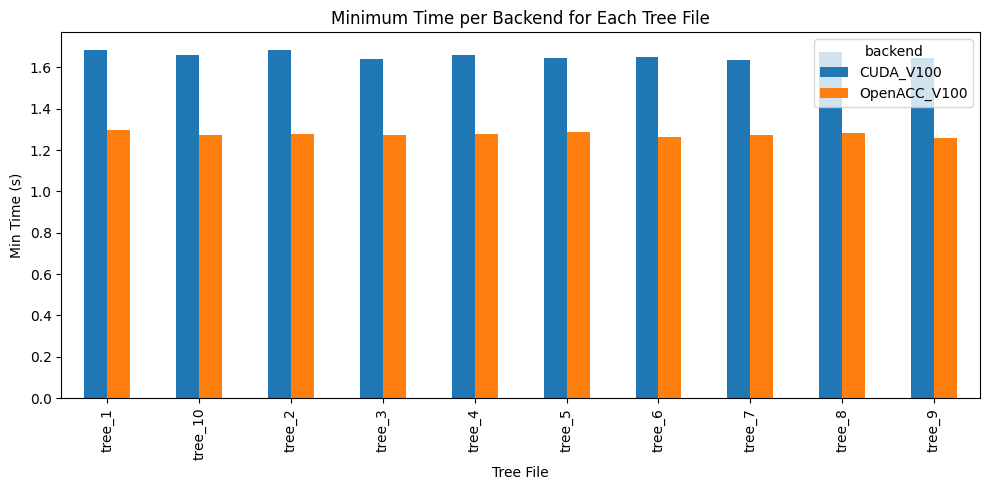

In [109]:
plot_min_time_per_backend(df, logy=False, path=f"{cwd}/min_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

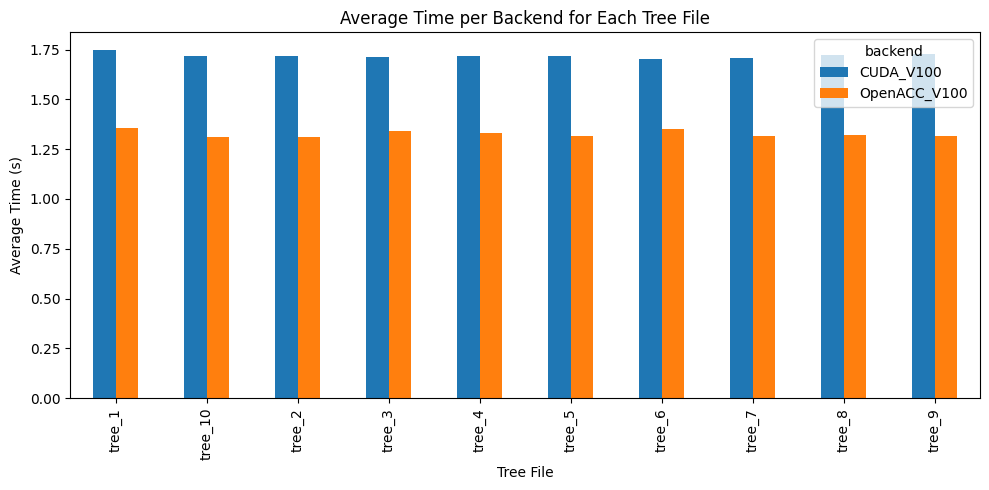

In [110]:
plot_average_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

In [111]:
def plot_max_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    max_times = groups['time'].max().unstack()
    max_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Max Time (s)')
    plt.title('Max Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

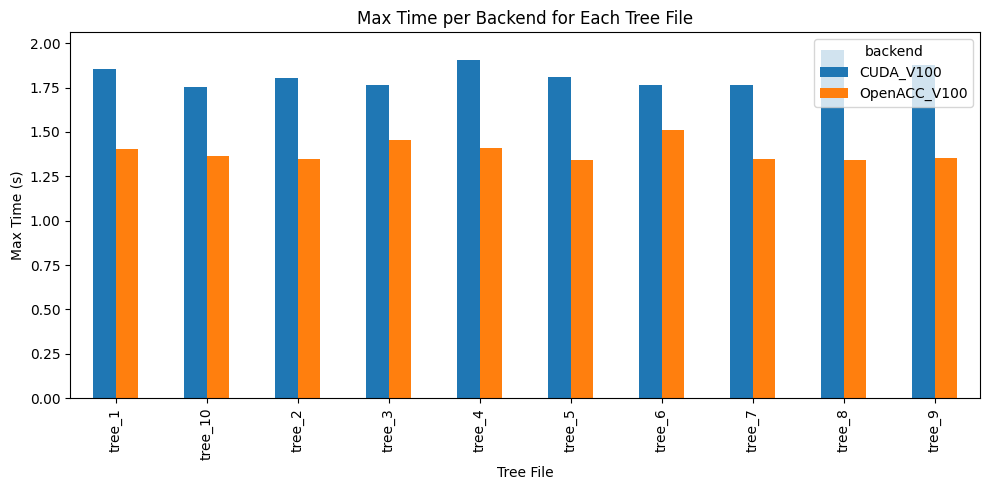

In [112]:

plot_max_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

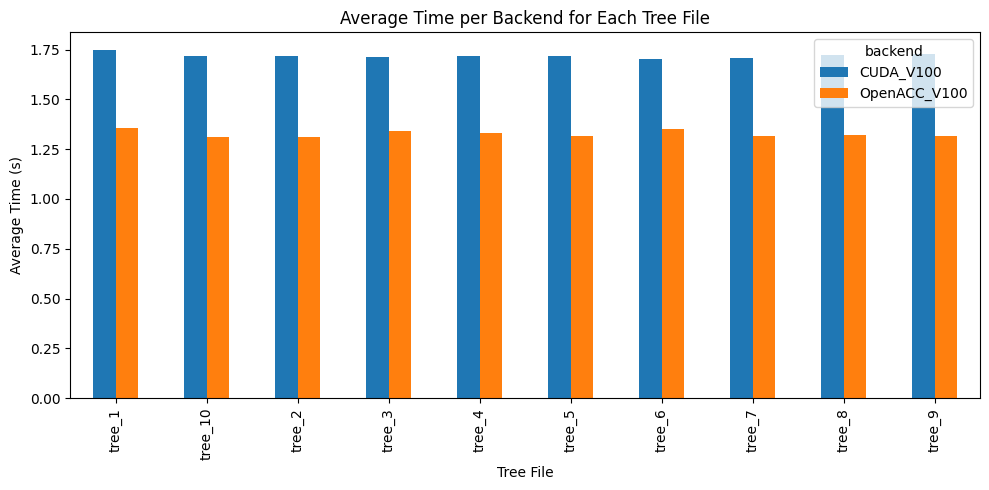

In [113]:
plot_average_time_per_backend_v100(df, logy=False, path=f"{cwd}/average_time_per_backend_v100_100taxa_diff_trees_1M_sites_AA.png")

<Figure size 1000x500 with 0 Axes>

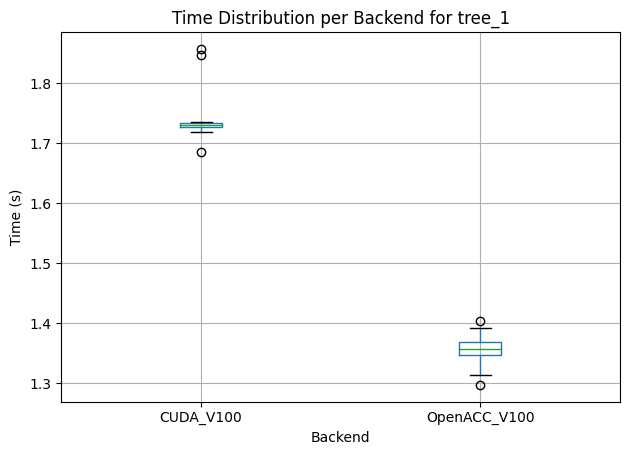

<Figure size 1000x500 with 0 Axes>

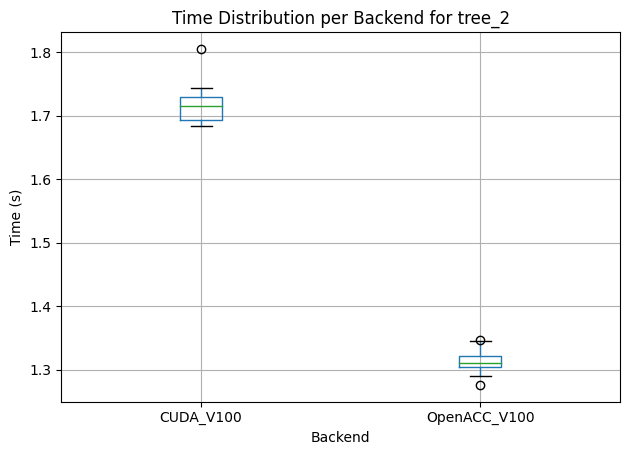

<Figure size 1000x500 with 0 Axes>

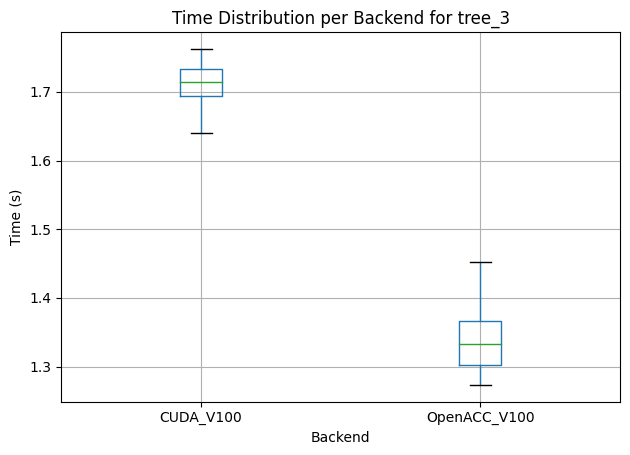

<Figure size 1000x500 with 0 Axes>

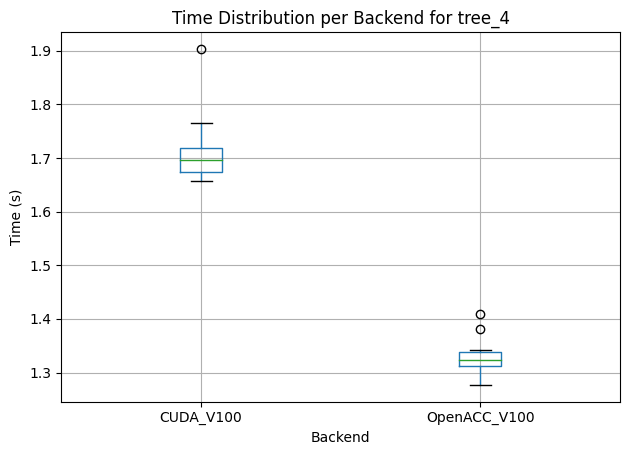

<Figure size 1000x500 with 0 Axes>

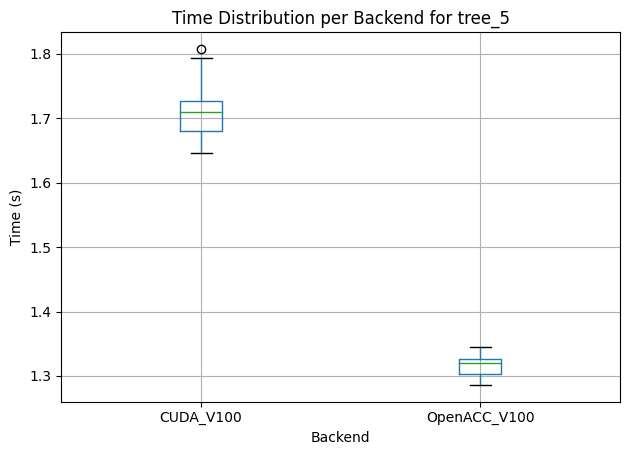

<Figure size 1000x500 with 0 Axes>

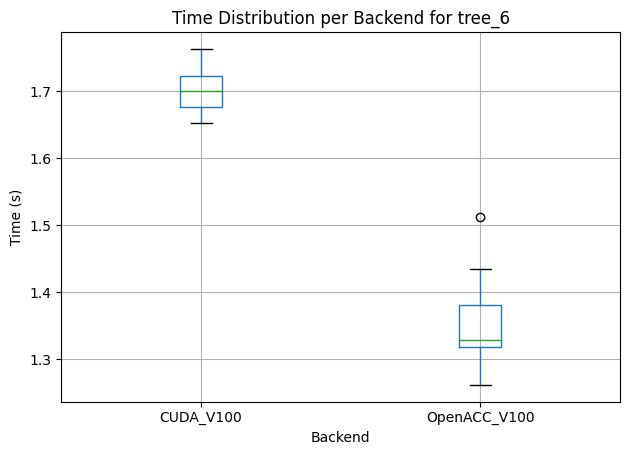

<Figure size 1000x500 with 0 Axes>

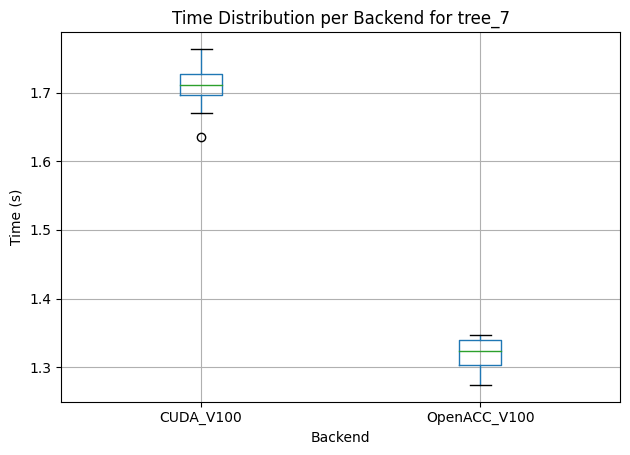

<Figure size 1000x500 with 0 Axes>

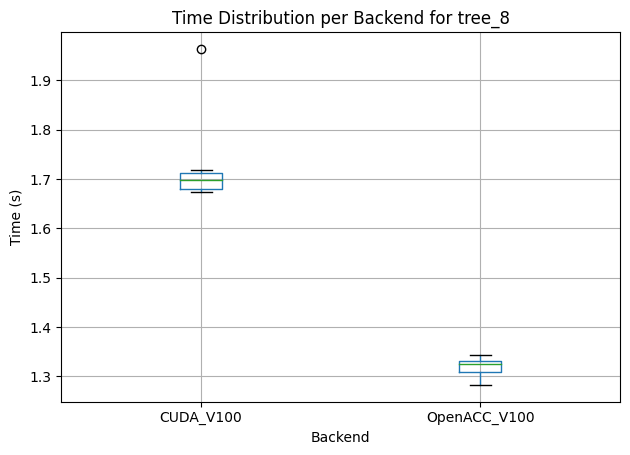

<Figure size 1000x500 with 0 Axes>

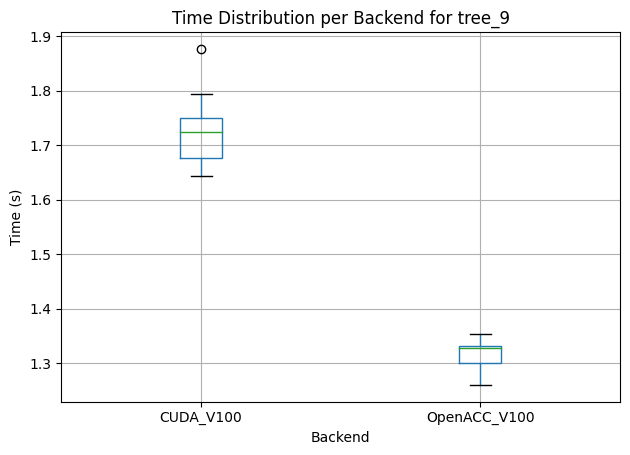

<Figure size 1000x500 with 0 Axes>

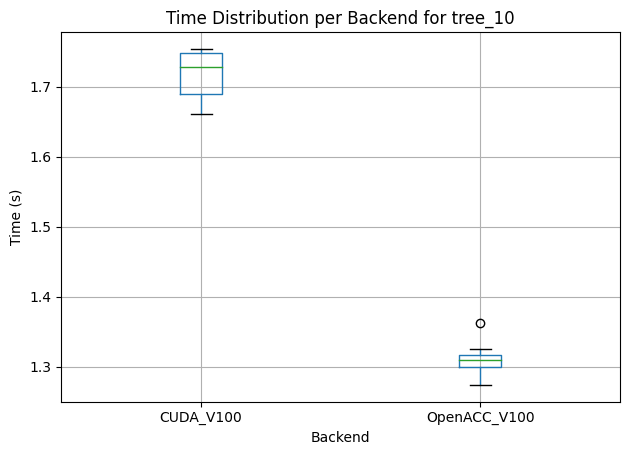

<Figure size 1000x500 with 0 Axes>

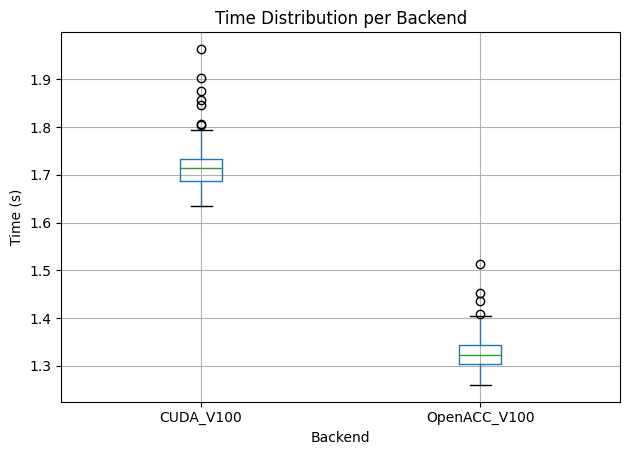

In [128]:
boxplot_per_tree_group_backend(df)
plot_boxplot_time_per_backend(df, logy=False, path=f"{cwd}/boxplot_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

In [134]:
data = []
read_files_in_directory(f"{results_path}/{DNA_folder}", unique_name="_GPU")
write_to_csv(data, output_csv_aa)
df = pd.read_csv(output_csv_aa)



Reading file: output_v100_cudaCublas_run10_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398815512657 1.633975299000000 tree_1 run10
Reading file: output_v100_cudaCublas_run6_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398815512657 1.638001907000000 tree_1 run6
Reading file: output_v100_OpenACC_run3_tree_1_1000000_dna_openacc_v100.txt
tree_1
found a match
OpenACC
OpenACC_V100 100 1000000 1000000 -70051678.096398830413818 1.154122693000000 tree_1 run3
Reading file: output_v100_cudaCublas_run7_tree_1_1000000_dna_cublas_v100.txt
tree_1
found a match
CUDA
CUDA_V100 100 1000000 1000000 -70051678.096398785710335 1.678537646000000 tree_1 run7
Reading file: output_v100_OpenACC_run6_tree_1_1000000_dna_openacc_v100.txt
tree_1
found a match
OpenACC
OpenACC_V100 100 1000000 1000000 -70051678.096398830413818 1.192432770000000 tree_1 run6
Reading file: output_v100_OpenACC_run9_tree_1

In [135]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.633975,tree_1,run10
1,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.638002,tree_1,run6
2,OpenACC_V100,100,1000000,1000000,-7.005168e+07,1.154123,tree_1,run3
3,CUDA_V100,100,1000000,1000000,-7.005168e+07,1.678538,tree_1,run7
4,OpenACC_V100,100,1000000,1000000,-7.005168e+07,1.192433,tree_1,run6
...,...,...,...,...,...,...,...,...
195,CUDA_V100,100,1000000,1000000,-6.804077e+07,1.582422,tree_10,run10
196,OpenACC_V100,100,1000000,1000000,-6.804077e+07,1.196379,tree_10,run4
197,OpenACC_V100,100,1000000,1000000,-6.804077e+07,1.144419,tree_10,run2
198,CUDA_V100,100,1000000,1000000,-6.804077e+07,1.622179,tree_10,run3


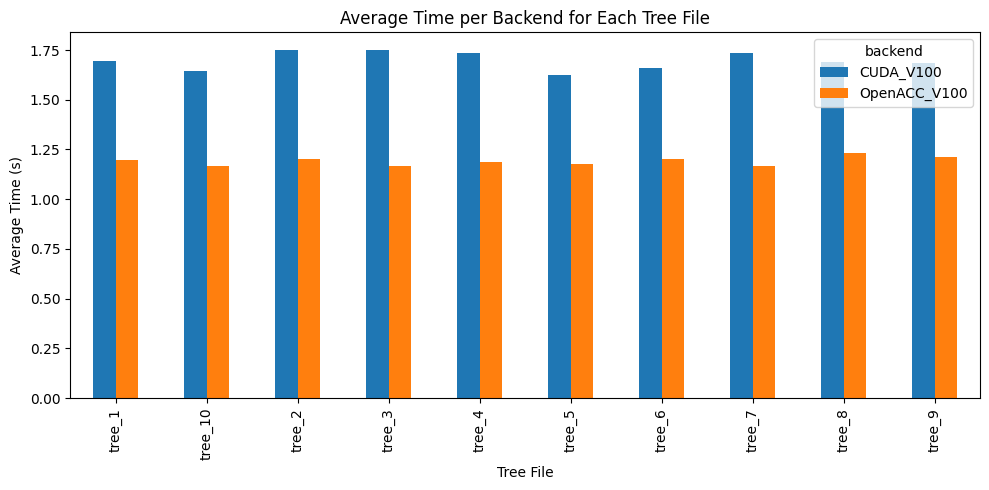

In [136]:
plot_average_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_DNA.png")

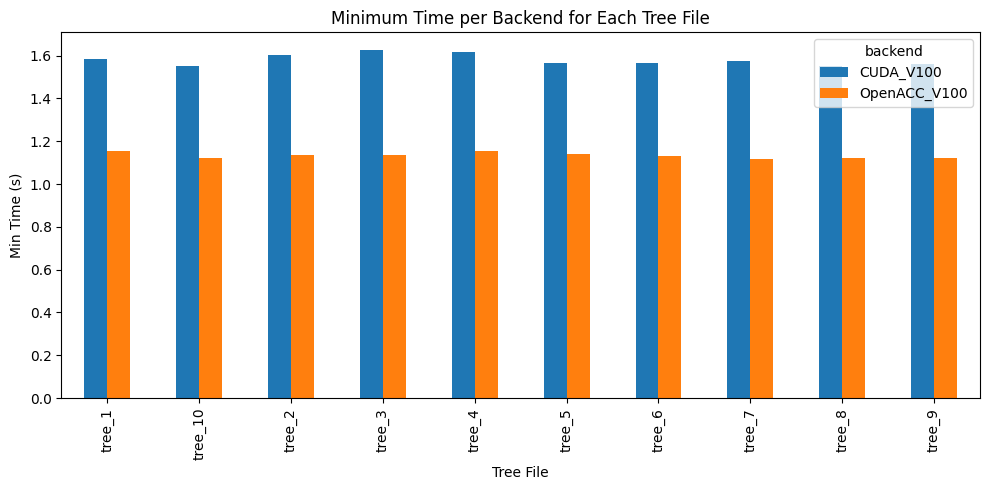

In [137]:
plot_min_time_per_backend(df, logy=False, path=f"{cwd}/min_time_per_backend_100taxa_diff_trees_1M_sites_DNA.png")

In [ ]:
plot_average_time_per_backend_v100(df, logy=False, path=f"{cwd}/average_time_per_backend_v100_100taxa_diff_trees_1M_sites_DNA.png")